# 📘 Paprastoji regresijos analizė
Šiame Jupyter Notebooke atliksime **paprastąją tiesinę regresiją**, naudodami dviračių nuomos duomenų rinkinį.
Tikslas – ištirti, **kaip temperatūra veikia bendrą dviračių nuomos skaičių (`cnt`)**.


In [2]:
pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------------- ------------------------ 3.7/9.6 MB 28.0 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 35.0 MB/s eta 0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [s


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
pip install metrics

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ------------------- -------------------- 4.2/8.7 MB 25.9 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 30.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   --------- ------------------------------ 9.2/38.5 MB 44.1 MB/s eta 0:00:01
   ------------------ --------------------- 17.8/38.5 MB 41.8 MB/s eta 0:00:01
   ---------------------------- ----------- 27.3/38.5 MB 42.6 MB/s eta 0:00:01
   ----------------------------------- ---- 34.6/38.5 MB 42.4 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 39.1 MB/s eta 0:00:00

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ------------------


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
     
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scikit-learn
!pip install metrics

'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set_theme(style='whitegrid')

In [4]:
# Įkeliame duomenų rinkinį
data = pd.read_csv('day_denormalised.csv')
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


### 🔎 Duomenų aprašymas
- `cnt` – bendras dviračių nuomos kiekis per dieną (target kintamasis).
- `temp` – temperatūra tą dieną (aiškinamasis kintamasis).

Atliekame paprastąją regresiją su viena nepriklausoma kintamąja: `temp`.

In [3]:
# Paruošiame duomenis
X = data[['temp']]
y = data['cnt']

# Pridedame konstantą
X_const = sm.add_constant(X)

# Sukuriame ir treniruojame modelį
model = sm.OLS(y, X_const)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     473.5
Date:                Tue, 05 Aug 2025   Prob (F-statistic):           2.81e-81
Time:                        14:51:23   Log-Likelihood:                -6386.8
No. Observations:                 731   AIC:                         1.278e+04
Df Residuals:                     729   BIC:                         1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1214.6421    161.164      7.537      0.000     898.242    1531.042
temp         161.9685      7.444     21.759      0.000     147.355     176.582
==============================================================================
Omnibus:                       20.477   Durbin-Watson:                   0.468
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.566
Skew:                           0.167   Prob(JB):                      0.00187
Kurtosis:                       2.452   Cond. No.                         62.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/var/folders/fv/_rx8zgmn2sb26k0hd5f_mr500000gn/T/ipykernel_65789/103690449.py:10: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


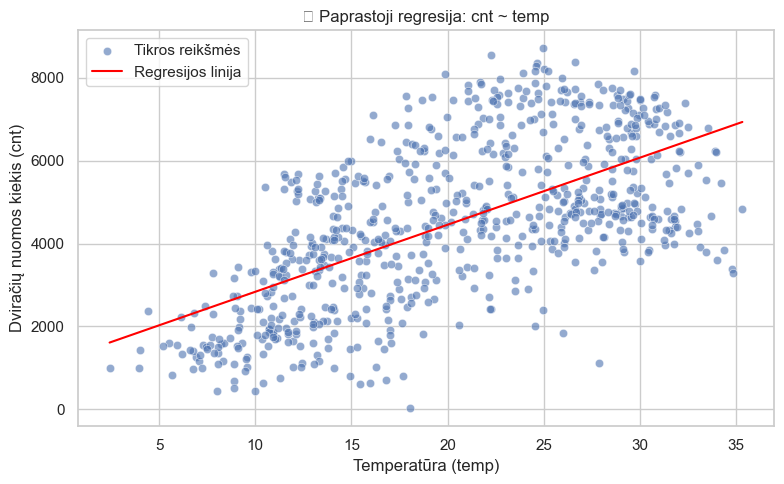

In [4]:
# Vizualizuojame rezultatus
plt.figure(figsize=(8, 5))
sns.scatterplot(x=data['temp'], y=data['cnt'], alpha=0.6, label='Tikros reikšmės')
sns.lineplot(x=data['temp'], y=results.predict(X_const), color='red', label='Regresijos linija')
plt.title('📈 Paprastoji regresija: cnt ~ temp')
plt.xlabel('Temperatūra (temp)')
plt.ylabel('Dviračių nuomos kiekis (cnt)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 🧠 Išvados
- **Regresijos lygtis**: `cnt = a + b * temp`, kur `a` – intercept, `b` – koeficientas.
- **R²** parodo, kiek `cnt` variacijos paaiškinama temperatūra.
- **P reikšmė** (P>|t|) parodo, ar temperatūros įtaka statistiškai reikšminga.
- **Klaidos** (RMSE, MAE) galėtų būti apskaičiuojamos papildomai tikslumo vertinimui.

Tai – pirmas žingsnis regresinės analizės link. Toliau galima išplėsti modelį įtraukiant daugiau kintamųjų.